# **TF-IDF Keyword Analysis


# Overview
This analysis uses TF-IDF (Term Frequency-Inverse Document Frequency) to identify the most important keywords within predefined themes related to disability and digital inclusion. Unlike unsupervised topic modeling approaches, this method extracts meaningful terms from text that has already been categorized by theme.

# Import Required Libraries

Import required libraries and configure settings for TF-IDF calculation and visualization.

In [2]:
import pandas as pd # data manipulation
from sklearn.feature_extraction.text import TfidfVectorizer # calculate TF-IDF scores
import matplotlib.pyplot as plt # visualization
import seaborn as sns # visualization

# filter out warnings for cleaner output
import warnings
warnings.filterwarnings("ignore")

# Load the Dataset

In [4]:
# Load the cleaned datasets
df = pd.read_csv("../1_datasets/processed_data/cleaned_datasets.csv") 

# Verify Required Columns Exist

 Validate the dataset to ensure it contains the required columns (theme and cleaned_text).

In [5]:
# Check column names: assumes 'theme' and 'text' exist
assert 'theme' in df.columns and 'cleaned_text' in df.columns

# Process Each Theme and Plot Keywords
For each theme, calculate TF-IDF scores and visualize the top keywords.

# Key Notes
1. **TF-IDF Approach**
* Extracts keywords that are both frequent in a theme and rare in others
* Provides interpretable results without complex model training
2. **Customization**
* Stop words list removes domain-specific common terms
* max_features=20 focuses analysis on most significant keywords
3. **Visual Output**
* Each plot shows a horizontal bar chart of keywords ranked by importance
* Consistent styling with white grid background for readability

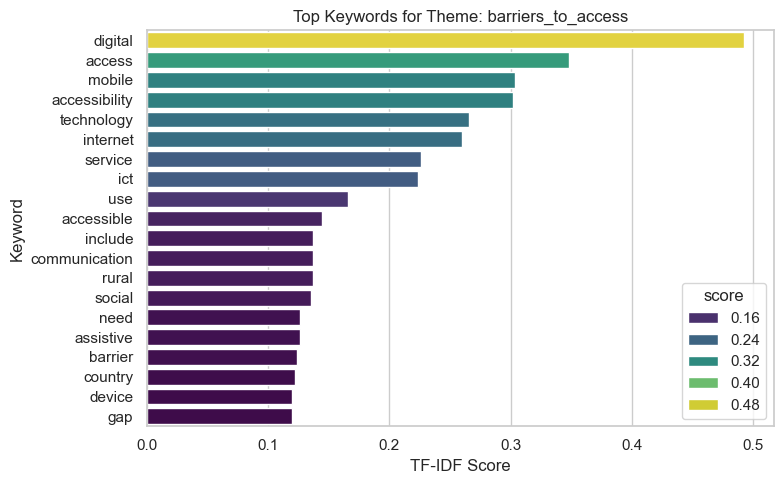

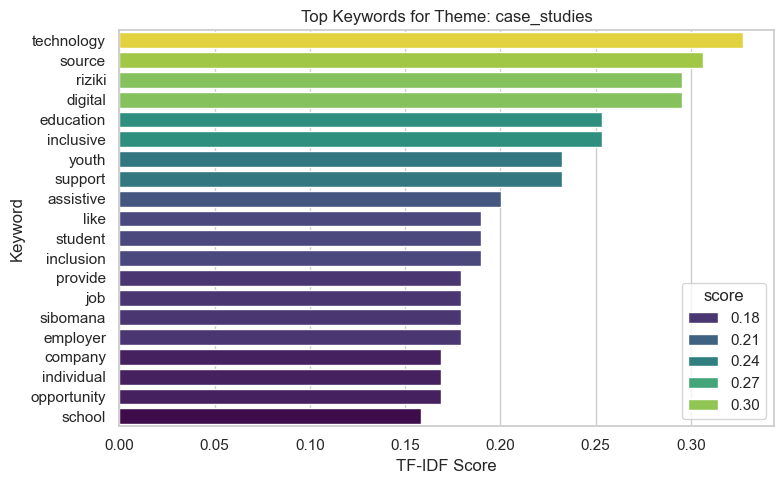

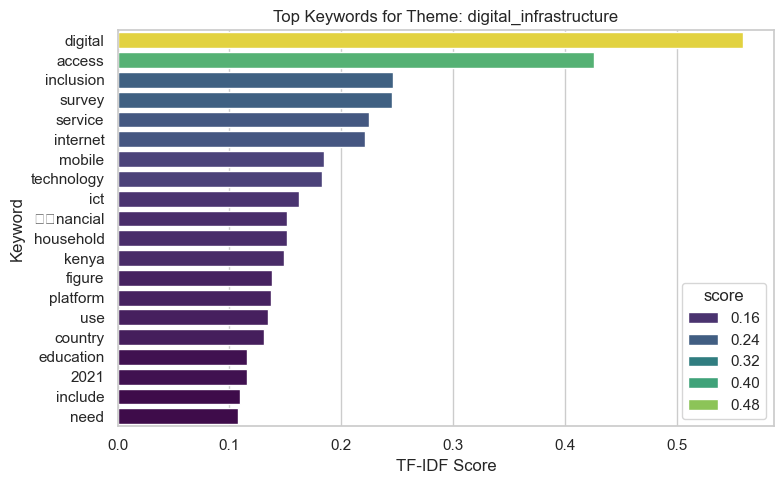

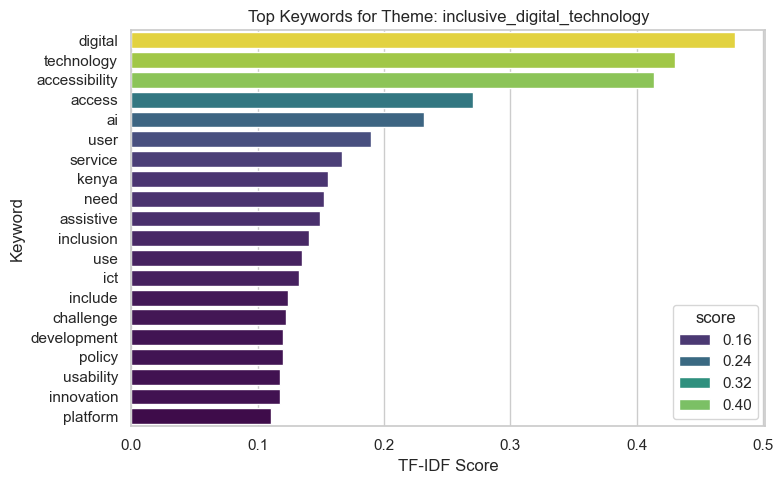

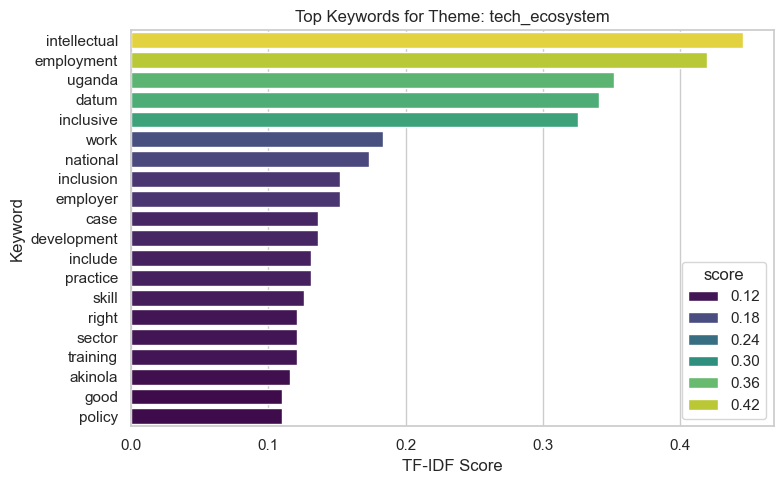

In [6]:
# Prepare plot settings
sns.set(style="whitegrid")

# Loop through each theme and plot top keywords
for theme, group in df.groupby("theme"):
    # Combine all text for the current theme into a single string
    all_text = " ".join(group["cleaned_text"].dropna().astype(str))

    # Initialize TF-IDF Vectorizer with custom stop words
    vectorizer = TfidfVectorizer(
        max_features=20, # Limit to top 20 keywords
        stop_words=['disability', 'disabled', 'person', 'people',
        'africa', 'african', 'report', 'study', 'research', 'data', 'information', "nigeria", "india", "2024", "non", "percent", "sta", "et","al", "2022", "100"])

    # Calculate TF-IDF scores
    tfidf_matrix = vectorizer.fit_transform([all_text])
    scores = tfidf_matrix.toarray().flatten()
    keywords = vectorizer.get_feature_names_out()

    # Create a dataframe for plotting
    plot_df = pd.DataFrame({
        "keyword": keywords,
        "score": scores
    }).sort_values("score", ascending=False)

    # Create and customize the plot
    plt.figure(figsize=(8, 5)) # Set figure size
    sns.barplot(data=plot_df,
                y="keyword", # Keywords on y-axis
                x="score", # TF-IDF scores on x-axis
                palette="viridis", # Color palette
                hue=plot_df["score"], # Adjust hue for color intensity
                ) # Color palette

    plt.title(f"Top Keywords for Theme: {theme}") # Title with theme name
    plt.xlabel("TF-IDF Score") # X-axis label
    plt.ylabel("Keyword") # Y-axis label
    plt.tight_layout() # Adjust layout to prevent label clipping
    plt.show() # Display the plot


# Exporting Keywords By Theme
For each theme, we export the top keywords for further use in keywords in context checks (KWIC), we combine them in a CSV file


In [7]:
# Prepare list to collect keyword data
all_keywords = []

# Loop through each theme group
for theme, group in df.groupby("theme"):
    all_text = " ".join(group["cleaned_text"].astype(str))

    # Add keywords to list
    for keyword, score in zip(keywords, scores):
        all_keywords.append({
            "theme": theme,
            "keyword": keyword,
            "score": score
        })

# Convert to DataFrame
all_keywords_df = pd.DataFrame(all_keywords)

# Export to CSV
output_path = "../1_datasets/processed_data/per_theme_top_keywords.csv"
all_keywords_df.to_csv(output_path, index=False)